In [1]:
!pip install gdown  # Ensure gdown is installed

In [2]:
import gdown

# Replace FILE_ID with your actual file ID
file_id = "1GHGXy6YQrw3vPCcUttfMEST6nCCF8s9j"
output_file = "Nature_Datasets.zip"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)


Downloading...
From (original): https://drive.google.com/uc?id=1GHGXy6YQrw3vPCcUttfMEST6nCCF8s9j
From (redirected): https://drive.google.com/uc?id=1GHGXy6YQrw3vPCcUttfMEST6nCCF8s9j&confirm=t&uuid=c652745f-6f42-481f-8ec0-23d5f0003d68
To: /content/Nature_Datasets.zip
100%|██████████| 255M/255M [00:02<00:00, 123MB/s]


'Nature_Datasets.zip'

In [3]:
import zipfile
z = zipfile.ZipFile('/content/Nature_Datasets.zip')
z.extractall()

In [4]:
import os
import shutil

src = 'Nature_Datasets'
dst_dir = 'datasets'
dst = os.path.join(dst_dir, src)

# Create 'datasets' directory if it doesn't exist
os.makedirs(dst_dir, exist_ok=True)

# If 'pothole_datasets' already exists in 'datasets', remove it
if os.path.exists(dst):
    shutil.rmtree(dst)

# Move 'pothole_datasets' to 'datasets'
shutil.move(src, dst)

print(f"Moved '{src}' to '{dst}' successfully.")


Moved 'Nature_Datasets' to 'datasets/Nature_Datasets' successfully.


## **Importing libraries**

In [5]:
import yaml

# Define YAML configuration
data = {
    'path': 'Nature_Datasets',
    'train': 'train',
    'val': 'val',
    'nc': 6,
    'names': ['buildings','forest','glacier','mountain','sea','street']
}

# Save to pothole.yaml
with open('Nature_Datasets.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("Nature_Datasets.yaml created successfully!")


Nature_Datasets.yaml created successfully!


In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 126.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 93.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 107.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [7]:
from ultralytics import YOLO

# Load a YOLOv11 classification model
model = YOLO('yolov8l-cls.pt')  # Replace with 'yolo11m-cls.pt' or similar for better accuracy

# Train the classification model
model.train(
    data='Nature_Datasets',  # Make sure this is for classification
    epochs=10,
    imgsz=224,           # Classification models usually use smaller image sizes like 224 or 256
    batch=8,
    name='Nature_Datasets_yolov8',
    save=True,
    save_period=-1,      # Only save the best
    patience=20,
    val=True             # Enable validation to track best model
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 71.7M/71.7M [00:00<00:00, 307MB/s]


Ultralytics 8.3.132 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Nature_Datasets, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8l-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Nature_Datasets_yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.0, plots=True, pose=12.0, pret

100%|██████████| 5.35M/5.35M [00:00<00:00, 241MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 43.8±63.0 MB/s, size: 15.1 KB)


train: Scanning /content/datasets/Nature_Datasets/train... 13884 images, 0 corrupt: 100%|██████████| 13884/13884 [00:03<00:00, 3756.93it/s]


train: New cache created: /content/datasets/Nature_Datasets/train.cache
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 61.1±53.4 MB/s, size: 14.8 KB)


val: Scanning /content/datasets/Nature_Datasets/val... 3000 images, 0 corrupt: 100%|██████████| 3000/3000 [00:00<00:00, 3230.32it/s]

val: New cache created: /content/datasets/Nature_Datasets/val.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 50 weight(decay=0.0), 51 weight(decay=0.0005), 51 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 2 dataloader workers
Logging results to runs/classify/Nature_Datasets_yolov8
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/10      1.14G      1.775          8        224:   0%|          | 7/1736 [00:01<03:37,  7.96it/s]

       1/10      1.14G      1.801          8        224:   1%|          | 13/1736 [00:01<02:45, 10.38it/s]
100%|██████████| 755k/755k [00:00<00:00, 130MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 188/188 [00:08<00:00, 22.13it/s]

                   all      0.901      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 188/188 [00:09<00:00, 20.75it/s]

                   all      0.897          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 188/188 [00:09<00:00, 20.32it/s]

                   all      0.894      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 188/188 [00:09<00:00, 20.38it/s]

                   all      0.921      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 188/188 [00:08<00:00, 21.69it/s]

                   all      0.933      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 188/188 [00:09<00:00, 20.53it/s]

                   all      0.919          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 188/188 [00:09<00:00, 19.90it/s]

                   all      0.916      0.999



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 188/188 [00:09<00:00, 20.46it/s]

                   all      0.925          1



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 188/188 [00:08<00:00, 20.92it/s]

                   all      0.932          1



      Epoch    GPU_mem       loss  Instances       Size


      10/10      3.15G     0.1389          4        224: 100%|██████████| 1736/1736 [02:13<00:00, 13.03it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 188/188 [00:09<00:00, 20.05it/s]

                   all      0.932          1



10 epochs completed in 0.419 hours.
Optimizer stripped from runs/classify/Nature_Datasets_yolov8/weights/last.pt, 72.6MB
Optimizer stripped from runs/classify/Nature_Datasets_yolov8/weights/best.pt, 72.6MB

Validating runs/classify/Nature_Datasets_yolov8/weights/best.pt...
Ultralytics 8.3.132 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8l-cls summary (fused): 54 layers, 36,192,262 parameters, 0 gradients, 98.7 GFLOPs
train: /content/datasets/Nature_Datasets/train... found 13884 images in 6 classes ✅ 
val: /content/datasets/Nature_Datasets/val... found 3000 images in 6 classes ✅ 
test: /content/datasets/Nature_Datasets/test... found 150 images in 6 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 188/188 [00:08<00:00, 21.20it/s]


                   all      0.932          1
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/Nature_Datasets_yolov8


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ecea1755b90>
curves: []
curves_results: []
fitness: 0.9658333361148834
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.9319999814033508, 'metrics/accuracy_top5': 0.999666690826416, 'fitness': 0.9658333361148834}
save_dir: PosixPath('runs/classify/Nature_Datasets_yolov8')
speed: {'preprocess': 0.10921547166738794, 'inference': 1.4343651433349198, 'loss': 0.0021903636664622654, 'postprocess': 0.0013067356679433337}
task: 'classify'
top1: 0.9319999814033508
top5: 0.999666690826416


image 1/1 /content/datasets/Nature_Datasets/test/buildings/92.jpg: 224x224 buildings 1.00, street 0.00, forest 0.00, glacier 0.00, mountain 0.00, 10.9ms
Speed: 18.6ms preprocess, 10.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/datasets/Nature_Datasets/test/sea/116.jpg: 224x224 sea 1.00, glacier 0.00, mountain 0.00, street 0.00, buildings 0.00, 10.8ms
Speed: 3.2ms preprocess, 10.8ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/datasets/Nature_Datasets/test/glacier/205.jpg: 224x224 glacier 1.00, sea 0.00, mountain 0.00, buildings 0.00, street 0.00, 10.7ms
Speed: 2.6ms preprocess, 10.7ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /content/datasets/Nature_Datasets/test/sea/174.jpg: 224x224 sea 1.00, glacier 0.00, mountain 0.00, buildings 0.00, forest 0.00, 10.8ms
Speed: 2.7ms preprocess, 10.8ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

image 1/1 /con

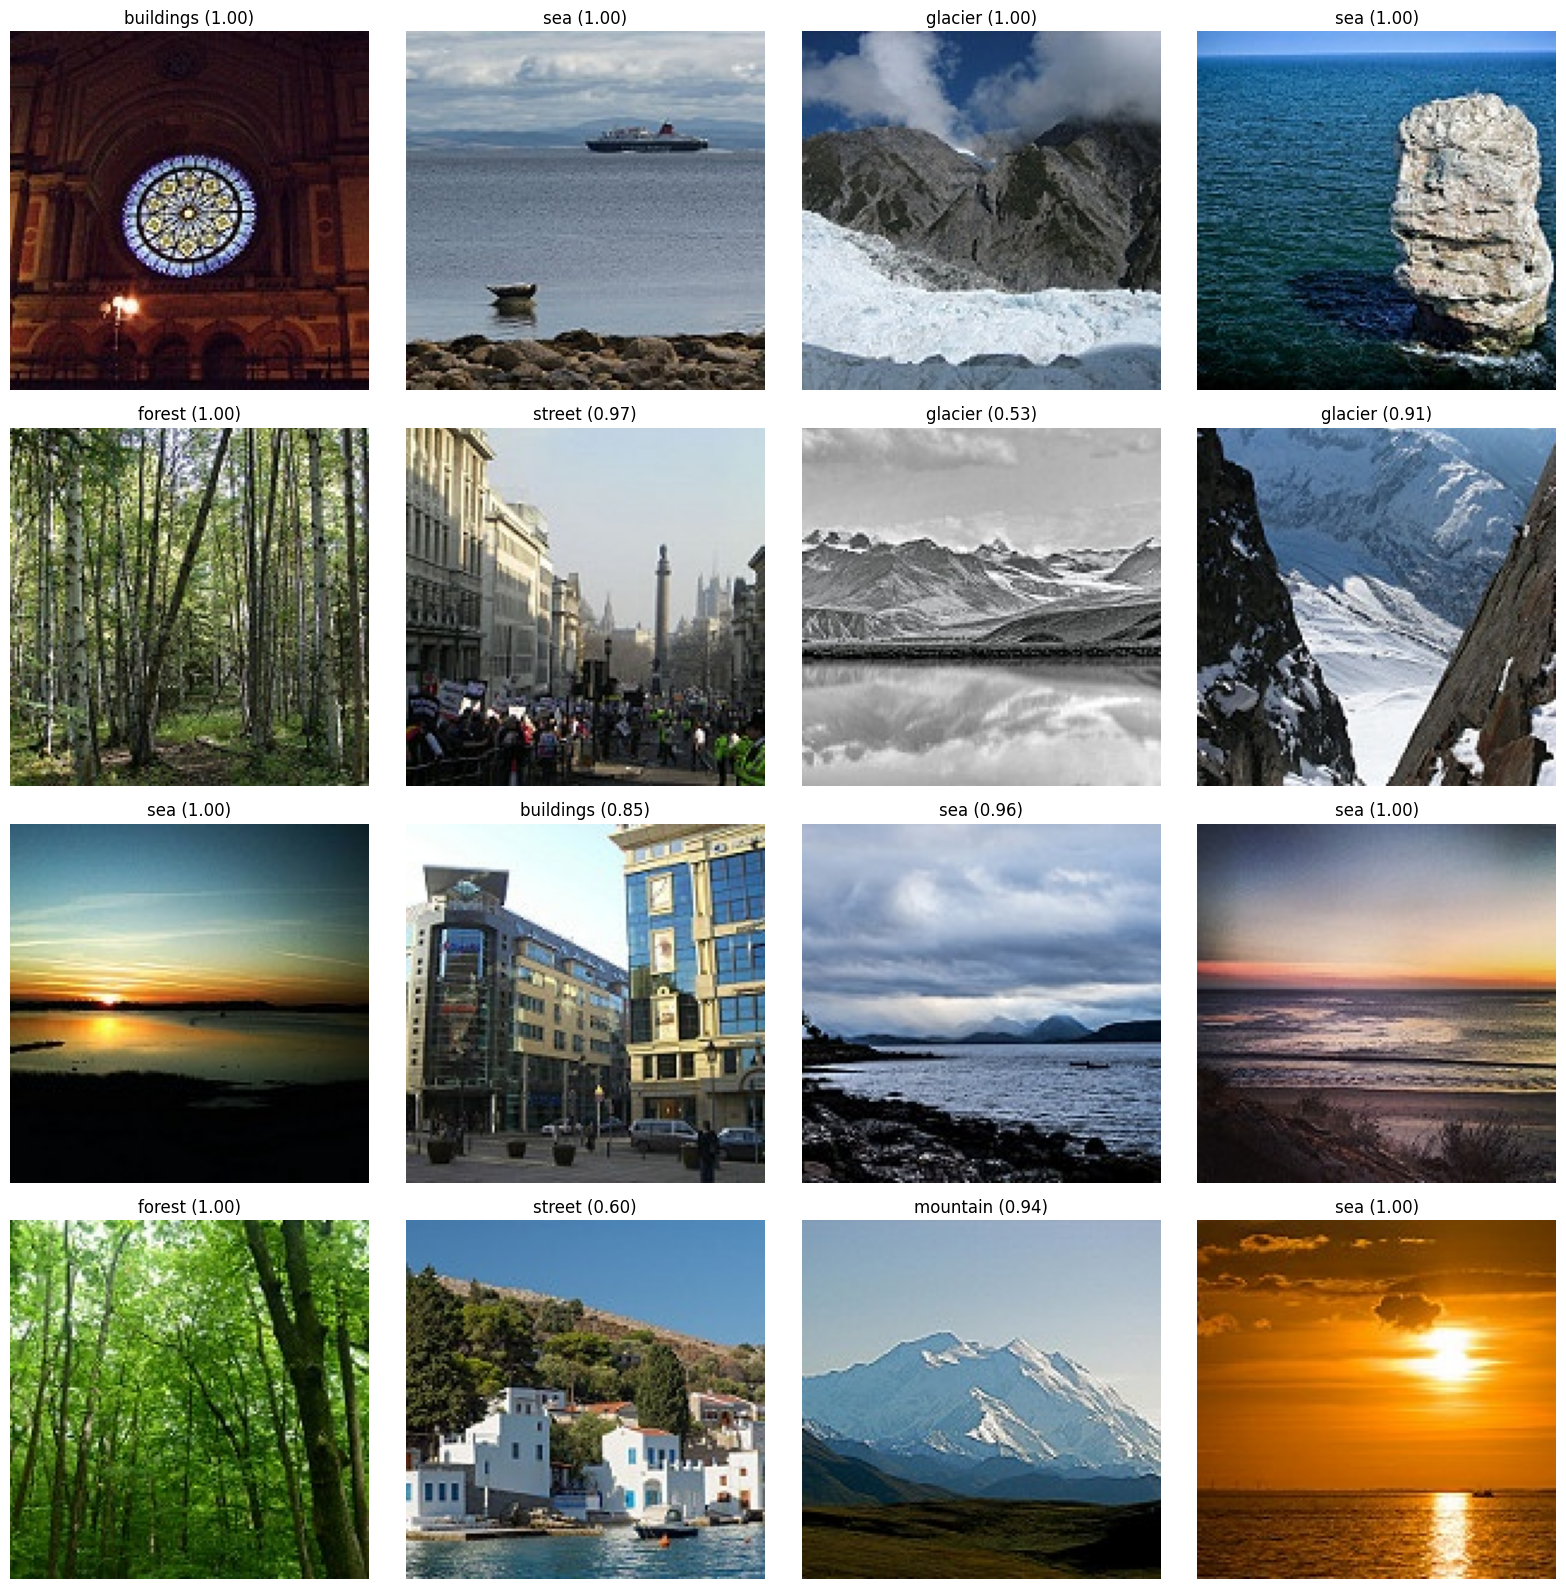

In [9]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

# Load trained classification model
model = YOLO('runs/classify/Nature_Datasets_yolov8/weights/best.pt')

# Test images directory
test_images_folders = 'datasets/Nature_Datasets/test'

# Get list of image files
image_folders = os.listdir(test_images_folders)

# Plot settings
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
ax = ax.ravel()

for idx in range(16):
    img_folder = random.choice(image_folders)
    img_files = os.listdir(os.path.join(test_images_folders,img_folder))
    img_path = os.path.join(test_images_folders, img_folder, random.choice(img_files))
    image = Image.open(img_path)

    # Perform classification inference
    results = model(img_path)  # returns a list with one result
    result = results[0]

    # Get predicted class name
    class_id = int(result.probs.top1)
    class_name = model.names[class_id]
    confidence = result.probs.top1conf.item()

    # Plot the image with class name and confidence
    ax[idx].imshow(image)
    ax[idx].set_title(f"{class_name} ({confidence:.2f})", fontsize=12)
    ax[idx].axis('off')

plt.tight_layout()
plt.show()
